### Here are the **high-level steps in time series analysis**:

1. **Visualize the data** – Plot to spot trend, seasonality, outliers.  
2. **Check stationarity** – Use ADF/KPSS tests and ACF plots.  
3. **Make it stationary** (if needed) – Differencing, log transform, detrending.  
4. **Identify model type** – Use ACF/PACF to choose AR, MA, or ARMA/ARIMA.  
5. **Fit the model** – Estimate parameters (e.g., with `auto_arima`).  
6. **Check residuals** – Ensure they’re random (no ACF spikes).  
7. **Forecast** – Predict future values with confidence intervals.  
8. **Validate** – Test on holdout data or use metrics (MAE, RMSE).

✅ Goal: Capture patterns → build reliable forecasts.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.set_index('Month', inplace = True)

In [10]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


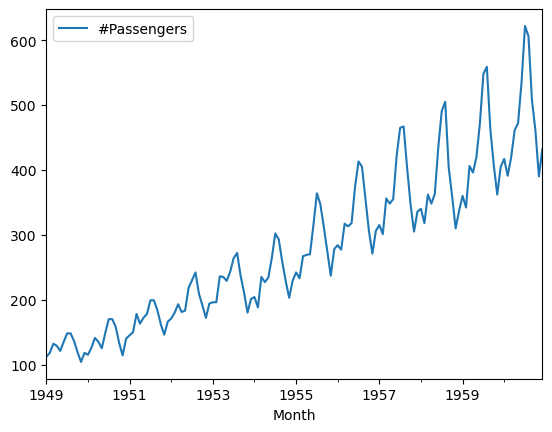

In [11]:
df.plot()
plt.show()

In [12]:
# applying seasonal decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df_decomposed = seasonal_decompose(df)

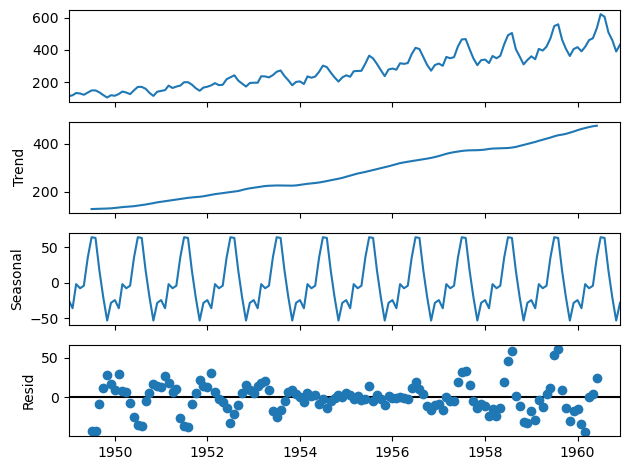

In [15]:
df_decomposed.plot()
plt.show()

In [16]:
# Stationarity check test
# null: data not stationary, p_value > 0.05
# alternate: data stationary, p_value < 0.05

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result = adfuller(df)

In [19]:
p_value = test_result[1]

In [20]:
p_value

0.9918802434376411

In [21]:
print(test_result)

(0.8153688792060597, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [22]:
# non stationary data

In [23]:
# need to remove trend and stationarity

In [24]:
# logrithmic transformation:

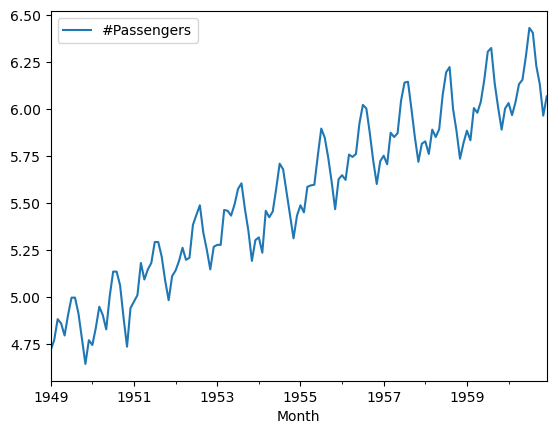

In [25]:
first_log = np.log(df)
first_log = first_log.dropna()
first_log.plot()
plt.show()

In [26]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [27]:
first_log.value_counts(ascending = True)

#Passengers
4.644391       1
5.874931       1
5.834811       1
5.828946       1
5.820083       1
              ..
5.891644       2
6.001415       2
5.192957       2
5.147494       2
5.433722       3
Name: count, Length: 118, dtype: int64

In [28]:
# rolling mean(mean log)
# rolling std (std log)

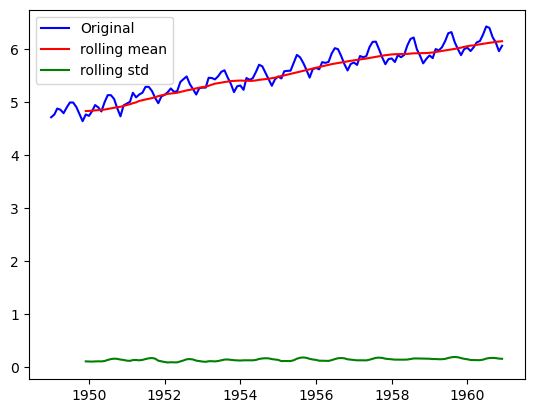

In [29]:
mean_log = first_log.rolling(window = 12).mean()
std_log = first_log.rolling(window = 12).std()

plt.plot(first_log, color = 'blue', label = 'Original')
plt.plot(mean_log, color = 'red', label = 'rolling mean')
plt.plot(std_log, color = 'green', label = 'rolling std')
plt.legend(loc = 'best')
plt.show()

In [30]:
new_df = first_log - mean_log
new_df = new_df.dropna()

In [31]:
new_df

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


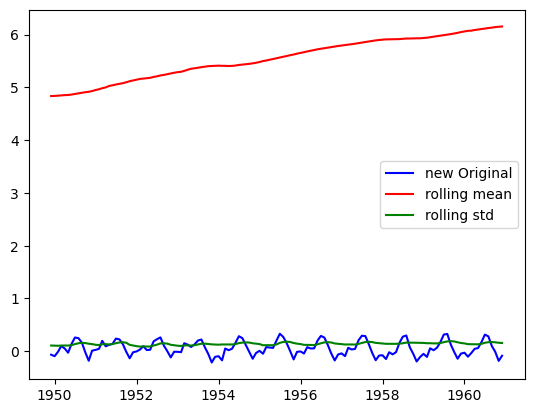

In [32]:
plt.plot(new_df, color = 'blue', label = 'new Original')
plt.plot(mean_log, color = 'red', label = 'rolling mean')
plt.plot(std_log, color = 'green', label = 'rolling std')
plt.legend(loc = 'best')
plt.show()

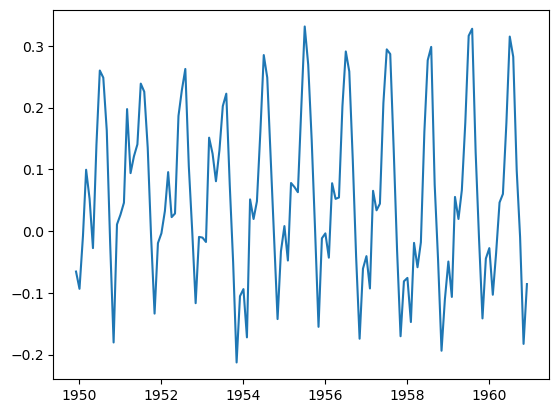

In [33]:
plt.plot(new_df)

In [34]:
# checking for stationarity again

In [35]:
test_result = adfuller(new_df)
p_val = test_result[1]
p_val

0.02223463000124264

In [36]:
# data is stationary now.

In [37]:
# model building

In [38]:
train = new_df.iloc[:120]['#Passengers']
test = new_df.iloc[120:]['#Passengers']

In [39]:
# implementation of ARIMA
# p order of lag
# d degree of diffrencing
# o order of moving average

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
from sklearn.metrics import *

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
import itertools


p = range(0, 7)
d = range(1, 2)      # only d=1
q = range(0, 7)

pdq = list(itertools.product(p, d, q))
rmse = []
orders = []

for i in pdq:
    try:
        model = ARIMA(train, order=i)
        model_fit = model.fit()
        pred = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
        error = np.sqrt(mean_squared_error(test, pred))
        orders.append(i)
        rmse.append(error)
    except:
        orders.append(i)
        rmse.append(np.nan)  # in case model fails

result = pd.DataFrame({'Order': orders, 'RMSE': rmse})
print(result.sort_values('RMSE').head())

        Order      RMSE
48  (6, 1, 6)  0.068879
34  (4, 1, 6)  0.071101
41  (5, 1, 6)  0.074777
43  (6, 1, 1)  0.096581
31  (4, 1, 3)  0.112859


In [44]:
A_model = ARIMA(train, order = (6,1,6))

In [45]:
A_model = A_model.fit()

In [46]:
new_df['ARIMA Prediction'] = A_model.predict(start=len(train), end=len(train) + len(test) - 1)

In [47]:
new_df.tail()

,#Passengers,ARIMA Prediction
Month,,
1960-08-01,0.282363,0.170734
1960-09-01,0.098235,0.107518
1960-10-01,-0.009230,0.022113
1960-11-01,-0.182690,-0.056586
1960-12-01,-0.085789,-0.104800


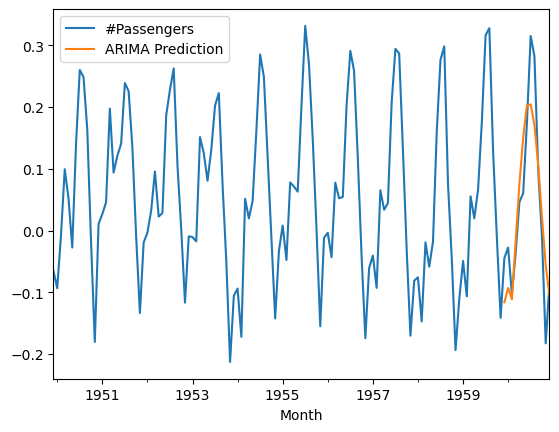

In [48]:
new_df[['#Passengers','ARIMA Prediction']].plot()
plt.show()

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
model = SARIMAX(train, order = (6,1,6), seasonal_order = (6,1,6,12))
model = model.fit()

In [51]:
new_df['SARIMA Prediction'] = model.predict(start=len(train), end=len(train) + len(test) - 1)

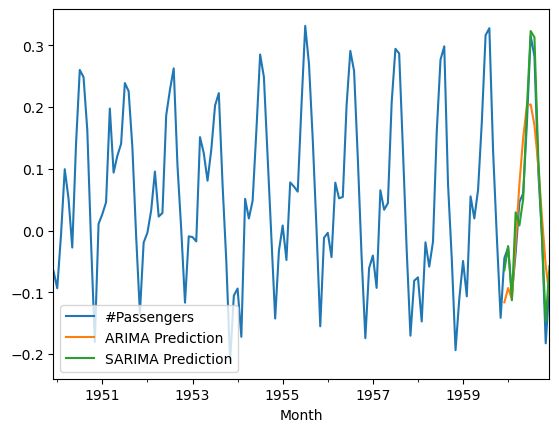

In [52]:
new_df[['#Passengers','ARIMA Prediction','SARIMA Prediction']].plot()
plt.show()

In [107]:
# predicting for next 5 yrs i.e. 60 months

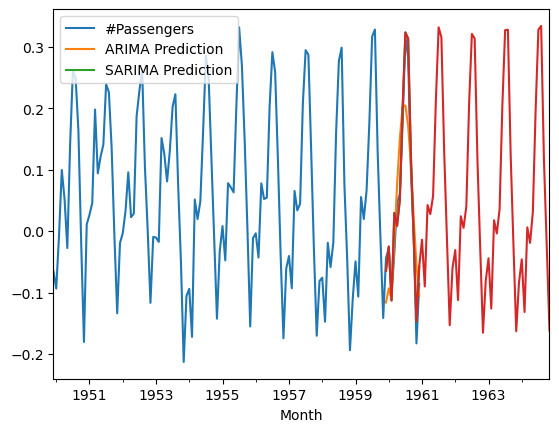

In [109]:
future = model.forecast(steps = 60)
new_df.plot()
future.plot()
plt.show()